- Cho tập dữ liệu sau:
    + x = [1, 3, 3, 5, 5, 6, 8, 9, 10, 12]
    + y = [2, 2, 4, 2, 4, 6, 6, 8, 5, 7]

- Lấy ngẫu nhiên 8 điểm (x, y) làm tập huấn luyện, tìm tham số (a, b) của mô hình tuyến tính ax+b, đánh giá MSE khi áp dụng mô hình huyến luyện và tập kiểm thử,
trực quan hóa bài toán (data_train, data_test, đường hồi quy)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = [1, 3, 3, 5, 5, 6, 8, 9, 10, 12]
y = [2, 2, 4, 2, 4, 6, 6, 8, 5, 7]

In [4]:
n = len(x)

In [5]:
index = np.random.permutation(n)

In [6]:
index

array([3, 8, 2, 7, 5, 4, 6, 1, 0, 9], dtype=int32)

In [7]:
train = index[:int(n*0.8)]
train

array([3, 8, 2, 7, 5, 4, 6, 1], dtype=int32)

In [8]:
test = index[int(n*0.8):]
test

array([0, 9], dtype=int32)

In [9]:
X = np.array(x)
Y = np.array(y)

In [13]:
X_train  = X[train]
y_train = Y[train]

X_train, y_train

(array([ 5, 10,  3,  9,  6,  5,  8,  3]), array([2, 5, 4, 8, 6, 4, 6, 2]))

In [10]:
X_test  = X[test]
y_test = Y[test]

X_test, y_test

(array([ 1, 12]), array([2, 7]))

In [14]:
Xs = np.expand_dims(X_train , axis=1)
Xs = np.concatenate((Xs, np.ones_like(Xs)), axis=1)

Ys = np.expand_dims(y_train , axis=1)
Ys


array([[2],
       [5],
       [4],
       [8],
       [6],
       [4],
       [6],
       [2]])

# Tìm 2 tham số a, b

In [15]:

param = np.linalg.inv((Xs.T).dot(Xs)).dot(Xs.T).dot(Ys)
param

array([[0.5601023],
       [1.1943734]])

In [17]:
# Tính MSE
mse = 1 / len(X_test) * np.linalg.norm(X_test*param - y_test)**2
mse

np.float64(28.28266429445136)

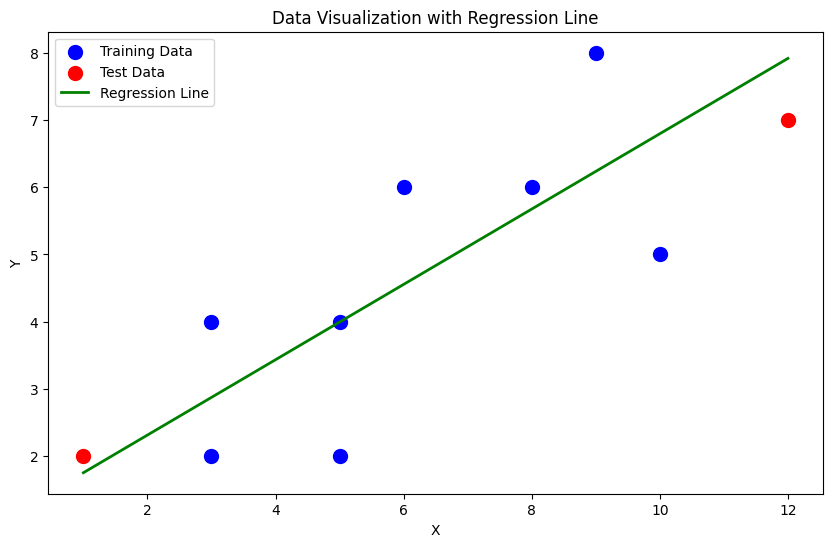

In [18]:
# Tạo biểu đồ
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', label='Training Data', s=100)
plt.scatter(X_test, y_test, color='red', label='Test Data', s=100)


y_values = param[0][0] * X + param[1][0] # bố dg tao cac gia tri x cho đương hồi quy 

plt.plot(X, y_values, color='green', label='Regression Line', linewidth=2)




plt.title('Data Visualization with Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()